### Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
import warnings
warnings.simplefilter('ignore')

### Загрузка датасета и обзор данных

In [4]:
df = pd.read_csv('course_project/course_project_train.csv')
df.sample(5)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
6418,Rent,NaN,2 years,0.0,4.0,13.4,99924.0,0.0,NaN,0.0,buy a car,Short Term,133210.0,63004.0,11104.0,NaN,0
870,Home Mortgage,307743.0,NaN,0.0,4.0,13.2,276034.0,0.0,48.0,0.0,debt consolidation,Short Term,140162.0,163058.0,5693.0,718.0,0
6498,Rent,749284.0,4 years,0.0,10.0,11.0,292754.0,0.0,NaN,0.0,debt consolidation,Short Term,118756.0,122626.0,9241.0,739.0,0
6396,Rent,689263.0,6 years,0.0,7.0,6.6,445390.0,0.0,NaN,0.0,debt consolidation,Long Term,266024.0,187701.0,15911.0,679.0,1
5945,Own Home,NaN,10+ years,0.0,11.0,18.4,1516482.0,0.0,NaN,0.0,other,Long Term,546898.0,733438.0,20186.0,NaN,1


In [5]:
df.shape

(7500, 17)

##### Обзор количественных признаков

In [6]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

##### Обзор номинативных признаков

In [8]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

#### _Обзор целевой переменной_

In [9]:
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

### Обработка выбросов

<AxesSubplot:>

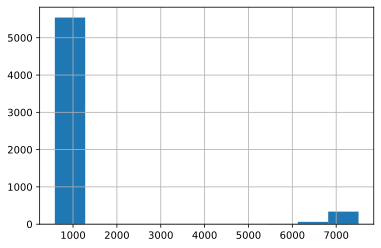

In [10]:
# У признака Credit Score есть большой разброс по значениям. Вероятно, указали лишний ноль при заполнении,
# т.к. показатели в 10 раз меньше как раз будут близки к средним значениям.
df['Credit Score'].hist()

<AxesSubplot:>

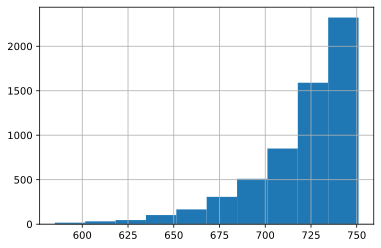

In [11]:
df['Credit Score'] = df['Credit Score'].apply(lambda x: (x / 10) if x > 800 else x)
# оставил отсечку на 800, и это с запасом, потому что ни одно значение не превышает даже 760
df['Credit Score'].hist()

### Обработка пропусков

In [12]:
len(df) - df.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

Есть пропуски в нескольких признаках. Самый значительный - почти 55% - в "кол-ве месяцев с последней просрочки платежа". Лучше его отбросить.
С остальными пропуски будем обрабатывать.

In [13]:
df.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

У признаков "Annual Income" и "Credit Score" одинаковое кол-во пропусков, при этом сами пропуски находятся в одних и тех же строках. Логично было бы предположить, что строчки не заполнены из-за отсутствия у заёмщика работы, но это на так, и в некоторых случаях стаж работы на последнем месте превышает 10 лет. Поэтому в обоих случаях будем применять заполнение средними значенями.

In [14]:
df['Annual Income'].fillna(df['Annual Income'].mean(), inplace=True)
df['Credit Score'].fillna(df['Credit Score'].mean(), inplace=True)

Признак "Bankruptcies" имеет незначительное кол-во пропусков. Заменим их модой.

Пропуски в "Years in current job" так же заменим модой.

In [15]:
df['Bankruptcies'].fillna(float(0), inplace=True)

In [16]:
df['Years in current job'].mode()

0    10+ years
dtype: object

In [17]:
df['Years in current job'].fillna('10+ years', inplace=True)

##### Проверяем пропуски

In [18]:
len(df) - df.count()

Home Ownership               0
Annual Income                0
Years in current job         0
Tax Liens                    0
Number of Open Accounts      0
Years of Credit History      0
Maximum Open Credit          0
Number of Credit Problems    0
Bankruptcies                 0
Purpose                      0
Term                         0
Current Loan Amount          0
Current Credit Balance       0
Monthly Debt                 0
Credit Score                 0
Credit Default               0
dtype: int64

### Генерация новых признаков

##### Преобразование номинативныч признаков

_Home Ownership_ 

In [19]:
df['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [20]:
df = df.join(pd.get_dummies(df['Home Ownership']))

_Years in current job_ - разобьём по категориям.

<AxesSubplot:title={'center':'Number of Years in current job'}>

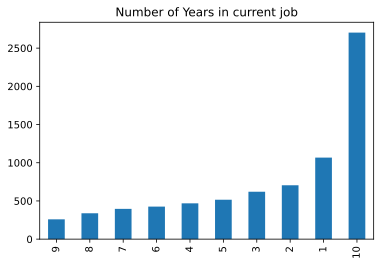

In [21]:
df['Years in current job'] = df['Years in current job'].str.extract(r"(\d+)")
df['Years in current job'].value_counts().sort_values(ascending = True).plot(kind='bar', title='Number of Years in current job')

In [22]:
df['Years in current job'] = df['Years in current job'].astype(int)
df['Employment'] = df['Years in current job'].apply(
    lambda x: 'Junior specialist' if x<=3 else ('Middle specialist' if x>3 and x<=6 else 'Senior specialist')
)

In [23]:
df['Employment'].value_counts()

Senior specialist    3697
Junior specialist    2392
Middle specialist    1411
Name: Employment, dtype: int64

In [24]:
df = df.join(pd.get_dummies(df['Employment']))

_Purpose_ - несбалансированнаая выборка, которая нам ничего не даёт в плане прогнозирования возникновения просрочки, поэтому просто убрём её.

_Term_ - вместо Short и Long поставим 0 и 1.

In [25]:
df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [26]:
df['Term'].replace(('Short Term','Long Term'),(0,1), inplace=True)
df['Term'].value_counts()

0    5556
1    1944
Name: Term, dtype: int64

In [27]:
# удалим ненужные данные

df = df.drop(['Home Ownership', 'Years in current job', 'Employment', 'Purpose', 'Have Mortgage'], axis=1)

In [28]:
df.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Mortgage,Own Home,Rent,Junior specialist,Middle specialist,Senior specialist
0,482087.0,0.0,11.0,26.3,685960.0,1.0,1.0,0,99999999.0,47386.0,7914.0,749.0,0,0,1,0,0,0,1
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,0.0,1,264968.0,394972.0,18373.0,737.0,1,0,1,0,0,0,1
2,751412.0,0.0,11.0,35.0,1182434.0,0.0,0.0,0,99999999.0,308389.0,13651.0,742.0,0,1,0,0,0,0,1
3,805068.0,0.0,8.0,22.5,147400.0,1.0,1.0,0,121396.0,95855.0,11338.0,694.0,0,0,1,0,0,1,0
4,776264.0,0.0,13.0,13.6,385836.0,1.0,0.0,0,125840.0,93309.0,7180.0,719.0,0,0,0,1,0,0,1


##### Преобразование количественных признаков

_Tax Liens_

In [29]:
df['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
6.0       2
5.0       2
7.0       1
Name: Tax Liens, dtype: int64

In [30]:
# разобъём на 3 категории

df['Tax Liens'] = df['Tax Liens'].apply(
    lambda x: "No Tax Liens" if x==0 else ("Few Tax Liens" if x>0 and x<=2 else "Many Tax Liens")
)

In [31]:
df['Tax Liens'].value_counts()

No Tax Liens      7366
Few Tax Liens      113
Many Tax Liens      21
Name: Tax Liens, dtype: int64

In [32]:
df = df.join(pd.get_dummies(df['Tax Liens']))

_Number of Credit Problems_

In [33]:
df['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

In [34]:
# тоже 3 категории

df['Number of Credit Problems'] = df['Number of Credit Problems'].apply(
    lambda x: "No Credit Problems" if x==0 else ("Few Credit promblem" if x>0 and x<=2 else "Many Credit Problems")
)

In [35]:
df['Number of Credit Problems'].value_counts()

No Credit Problems      6469
Few Credit promblem      975
Many Credit Problems      56
Name: Number of Credit Problems, dtype: int64

In [36]:
df = df.join(pd.get_dummies(df['Number of Credit Problems']))

_Bankruptcies_

In [37]:
df['Bankruptcies'].value_counts()

0.0    6674
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [38]:
# и тут 3 категории

df['Bankruptcies'] = df['Bankruptcies'].apply(
    lambda x: "No Bankruptcies" if x==0 else ("Few Bankruptcies" if x>0 and x<=1 else "Many Bankruptcies")
)

In [39]:
df['Bankruptcies'].value_counts()

No Bankruptcies      6674
Few Bankruptcies      786
Many Bankruptcies      40
Name: Bankruptcies, dtype: int64

In [40]:
df = df.join(pd.get_dummies(df['Bankruptcies']))

In [41]:
# удаляем ненужные столбцы

df = df.drop(
    ['Tax Liens', 'Number of Credit Problems', 'Bankruptcies', 'Many Tax Liens', 'Many Credit Problems', 'Many Bankruptcies'],
    axis=1
)

In [42]:
df.head()

,Annual Income,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,...,Rent,Junior specialist,Middle specialist,Senior specialist,Few Tax Liens,No Tax Liens,Few Credit promblem,No Credit Problems,Few Bankruptcies,No Bankruptcies
0,482087.0,11.0,26.3,685960.0,0,99999999.0,47386.0,7914.0,749.0,0,...,0,0,0,1,0,1,1,0,1,0
1,1025487.0,15.0,15.3,1181730.0,1,264968.0,394972.0,18373.0,737.0,1,...,0,0,0,1,0,1,0,1,0,1
2,751412.0,11.0,35.0,1182434.0,0,99999999.0,308389.0,13651.0,742.0,0,...,0,0,0,1,0,1,0,1,0,1
3,805068.0,8.0,22.5,147400.0,0,121396.0,95855.0,11338.0,694.0,0,...,0,0,1,0,0,1,1,0,1,0
4,776264.0,13.0,13.6,385836.0,0,125840.0,93309.0,7180.0,719.0,0,...,1,0,0,1,0,1,1,0,0,1


##### Обработка оставшихся признаков

_Annual Income_ - найдём среднее и стандартное отклонение

In [43]:
mean_income = df['Annual Income'].mean()
std_income = df['Annual Income'].std()
lowcap = mean_income - std_income
highcap = mean_income + std_income
print(lowcap, '\n', highcap)

613910.5179680381 
 2118872.9223819533


In [44]:
df['Annual Income'] = df['Annual Income'].apply(
    lambda x: "Low Income" if x<=lowcap else ("Avg Income" if x>lowcap and x<highcap else "High Income")
)

In [45]:
df = df.join(pd.get_dummies(df['Annual Income']))

_Years of Credit History_

In [46]:
df['Credit History'] = df['Years of Credit History'].apply(
    lambda x: "Short Credit History" if x<=3 else ("Avg Credit History" if x>3 and x<10 else "Long Credit History")
)

In [47]:
df = df.join(pd.get_dummies(df['Credit History']))

_Current Loan Amount_ - найдём среднее и стандартное отклонение

In [48]:
mean_cla = df[df['Current Loan Amount'] < 99999999.0]['Current Loan Amount'].mean()
std_cla = df[df['Current Loan Amount'] < 99999999.0]['Current Loan Amount'].std()
low_cla = mean_cla - std_cla
high_cla = mean_cla + std_cla
print(low_cla, '\n', high_cla)

126730.38172561661 
 491318.3989681994


In [49]:
df['Current Loan Amount'] = df['Current Loan Amount'].apply(
    lambda x: "Small Loan Amt" if x<=low_cla else ("Avg Loan Amt" if x>low_cla and x<high_cla else "Big Loan Amt")
)

In [50]:
df = df.join(pd.get_dummies(df['Current Loan Amount']))

_Credit Score_ - разобъём на несколько классов

In [51]:
df['Credit Score'] = df['Credit Score'].apply(lambda x: "Poor Credit Hist" if np.isreal(x) and x < 600 else x)
df['Credit Score'] = df['Credit Score'].apply(lambda x: "Avg Credit Hist" if np.isreal(x) and (x >= 600 and x < 675) else x)
df['Credit Score'] = df['Credit Score'].apply(lambda x: "Good Credit Hist" if np.isreal(x) and (x >= 675 and x < 725) else x)
df['Credit Score'] = df['Credit Score'].apply(lambda x: "Very Good Credit Hist" if np.isreal(x) and (x >= 725 and x < 775) else x)
df['Credit Score'] = df['Credit Score'].apply(lambda x: "Excellent Credit Hist" if np.isreal(x) and (x >= 775 and x <= 800) else x)

In [52]:
df['Credit Score'].value_counts()

Good Credit Hist         3659
Very Good Credit Hist    3352
Avg Credit Hist           475
Poor Credit Hist           14
Name: Credit Score, dtype: int64

In [53]:
df = df.join(pd.get_dummies(df['Credit Score']))

In [54]:
# удаляем ненужные столбцы

df = df.drop(
    ['Annual Income', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 
     'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score', 'Poor Credit Hist', 'Credit History'], axis=1
)

In [55]:
df.describe()

,Term,Credit Default,Home Mortgage,Own Home,Rent,Junior specialist,Middle specialist,Senior specialist,Few Tax Liens,No Tax Liens,...,High Income,Low Income,Avg Credit History,Long Credit History,Avg Loan Amt,Big Loan Amt,Small Loan Amt,Avg Credit Hist,Good Credit Hist,Very Good Credit Hist
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,0.259200,0.281733,0.484933,0.086267,0.427200,0.318933,0.188133,0.492933,0.015067,0.982133,...,0.096400,0.075333,0.078667,0.921333,0.607867,0.263200,0.128933,0.063333,0.487867,0.446933
std,0.438225,0.449874,0.499806,0.280776,0.494705,0.466094,0.390845,0.499983,0.121826,0.132476,...,0.295159,0.263946,0.269236,0.269236,0.488259,0.440399,0.335148,0.243578,0.499886,0.497209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Разбиение на train и test

In [56]:
X = df.drop(columns='Credit Default')
y = df['Credit Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6000, 24)
(1500, 24)
(6000,)
(1500,)


In [58]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

__Обучение и оценка финальной модели__

In [59]:
%%time

final_model = KNeighborsClassifier()
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      4328
           1       0.51      0.34      0.41      1672

    accuracy                           0.73      6000
   macro avg       0.64      0.61      0.62      6000
weighted avg       0.70      0.73      0.71      6000

TEST

              precision    recall  f1-score   support

           0       0.74      0.86      0.80      1059
           1       0.45      0.27      0.34       441

    accuracy                           0.69      1500
   macro avg       0.59      0.57      0.57      1500
weighted avg       0.65      0.69      0.66      1500

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               912  147
1               322  119
Wall time: 773 ms


_Другие модели показали результаты хуже (ещё)_

### Загрузка тестового датасета

In [60]:
test_df = pd.read_csv('course_project/course_project_test.csv')

### Выполнение тех же этапов обработки и построения признаков

In [61]:
test_df.drop(columns = 'Months since last delinquent', axis=1, inplace=True)
test_df['Annual Income'].fillna(test_df['Annual Income'].mean(), inplace=True)
test_df['Credit Score'].fillna(test_df['Credit Score'].mean(), inplace=True)
test_df['Bankruptcies'].fillna(float(0), inplace=True)
test_df['Years in current job'].fillna('10+ years', inplace=True)

In [62]:
test_df = test_df.join(pd.get_dummies(test_df['Home Ownership']))
test_df['Years in current job'] = test_df['Years in current job'].str.extract(r"(\d+)")
test_df['Years in current job'] = test_df['Years in current job'].astype(int)
test_df['Employment'] = test_df['Years in current job'].apply(
    lambda x: 'Junior specialist' if x<=3 else ('Middle specialist' if x>3 and x<=6 else 'Senior specialist')
)
test_df = test_df.join(pd.get_dummies(test_df['Employment']))

test_df['Term'].replace(('Short Term','Long Term'),(0,1), inplace=True)

test_df = test_df.drop(['Home Ownership', 'Years in current job', 'Employment', 'Purpose', 'Have Mortgage'], axis=1)

test_df['Tax Liens'] = test_df['Tax Liens'].apply(
    lambda x: "No Tax Liens" if x==0 else ("Few Tax Liens" if x>0 and x<=2 else "Many Tax Liens")
)
test_df = test_df.join(pd.get_dummies(test_df['Tax Liens']))

test_df['Number of Credit Problems'] = test_df['Number of Credit Problems'].apply(
    lambda x: "No Credit Problems" if x==0 else ("Few Credit promblem" if x>0 and x<=2 else "Many Credit Problems")
)
test_df = test_df.join(pd.get_dummies(test_df['Number of Credit Problems']))

test_df['Bankruptcies'] = test_df['Bankruptcies'].apply(
    lambda x: "No Bankruptcies" if x==0 else ("Few Bankruptcies" if x>0 and x<=1 else "Many Bankruptcies")
)
test_df = test_df.join(pd.get_dummies(test_df['Bankruptcies']))

test_df = test_df.drop(
    ['Tax Liens', 'Number of Credit Problems', 'Bankruptcies', 'Many Tax Liens', 'Many Credit Problems', 'Many Bankruptcies'],
    axis=1
)

In [63]:
mean_income = test_df['Annual Income'].mean()
std_income = test_df['Annual Income'].std()
lowcap = mean_income - std_income
highcap = mean_income + std_income

test_df['Annual Income'] = test_df['Annual Income'].apply(
    lambda x: "Low Income" if x<=lowcap else ("Avg Income" if x>lowcap and x<highcap else "High Income")
)

test_df = test_df.join(pd.get_dummies(test_df['Annual Income']))

test_df = test_df.drop(['Annual Income'], axis=1)

In [64]:
test_df['Credit History'] = test_df['Years of Credit History'].apply(
    lambda x: "Short Credit History" if x<=3 else ("Avg Credit History" if x>3 and x<10 else "Long Credit History")
)

test_df = test_df.join(pd.get_dummies(test_df['Credit History']))

test_df = test_df.drop(['Years of Credit History', 'Credit History'], axis=1)

In [65]:
mean_cla = test_df[test_df['Current Loan Amount'] < 99999999.0]['Current Loan Amount'].mean()
std_cla = test_df[test_df['Current Loan Amount'] < 99999999.0]['Current Loan Amount'].std()
low_cla = mean_cla - std_cla
high_cla = mean_cla + std_cla

test_df['Current Loan Amount'] = test_df['Current Loan Amount'].apply(
    lambda x: "Small Loan Amt" if x<=low_cla else ("Avg Loan Amt" if x>low_cla and x<high_cla else "Big Loan Amt")
)

test_df = test_df.join(pd.get_dummies(test_df['Current Loan Amount']))

test_df = test_df.drop(['Current Loan Amount'], axis=1)

In [66]:
test_df['Credit Score'] = test_df['Credit Score'].apply(lambda x: (x / 10) if x > 800 else x)

test_df['Credit Score'] = test_df['Credit Score'].apply(lambda x: "Poor Credit Hist" if np.isreal(x) and x < 600 else x)
test_df['Credit Score'] = test_df['Credit Score'].apply(lambda x: "Avg Credit Hist" if np.isreal(x) and (x >= 600 and x < 675) else x)
test_df['Credit Score'] = test_df['Credit Score'].apply(lambda x: "Good Credit Hist" if np.isreal(x) and (x >= 675 and x < 725) else x)
test_df['Credit Score'] = test_df['Credit Score'].apply(lambda x: "Very Good Credit Hist" if np.isreal(x) and (x >= 725 and x < 775) else x)
test_df['Credit Score'] = test_df['Credit Score'].apply(lambda x: "Excellent Credit Hist" if np.isreal(x) and (x >= 775 and x <= 800) else x)

test_df = test_df.join(pd.get_dummies(test_df['Credit Score']))

In [67]:
test_df = test_df.drop(
    ['Number of Open Accounts', 'Maximum Open Credit', 
     'Current Credit Balance', 'Monthly Debt', 'Credit Score', 'Poor Credit Hist'], axis=1
)

### Сохранение результата

In [68]:
final_preds = final_model.predict(test_df)

predicted_df = pd.DataFrame(final_preds, columns=['Credit Default'])
predicted_df.to_csv('SChupin_predictions.csv', index_label='id')

In [69]:
predicted_df.head()

,Credit Default
0,0
1,0
2,0
3,0
4,0
